<a href="https://colab.research.google.com/github/singlarobin/StockPrediction/blob/master/stockPredc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(3971, 30, 1)
Train on 3573 samples, validate on 398 samples
Epoch 1/10
3573/3573 [==============================] - 12s 3ms/step - loss: 0.0074 - accuracy: 5.5975e-04 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 2/10
3573/3573 [==============================] - 11s 3ms/step - loss: 0.0035 - accuracy: 5.5975e-04 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 3/10
3573/3573 [==============================] - 12s 3ms/step - loss: 0.0026 - accuracy: 5.5975e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 4/10
3573/3573 [==============================] - 11s 3ms/step - loss: 0.0021 - accuracy: 5.5975e-04 - val_loss: 1.7283e-04 - val_accuracy: 0.0000e+00
Epoch 5/10
3573/3573 [==============================] - 11s 3ms/step - loss: 0.0018 - accuracy: 5.5975e-04 - val_loss: 9.2725e-04 - val_accuracy: 0.0000e+00
Epoch 6/10
3573/3573 [==============================] - 12s 3ms/step - loss: 0.0016 - accuracy: 5.5975e-04 - val_loss: 1.3952e-04 - val_accuracy: 0.0000e+00
Epoch 7/1

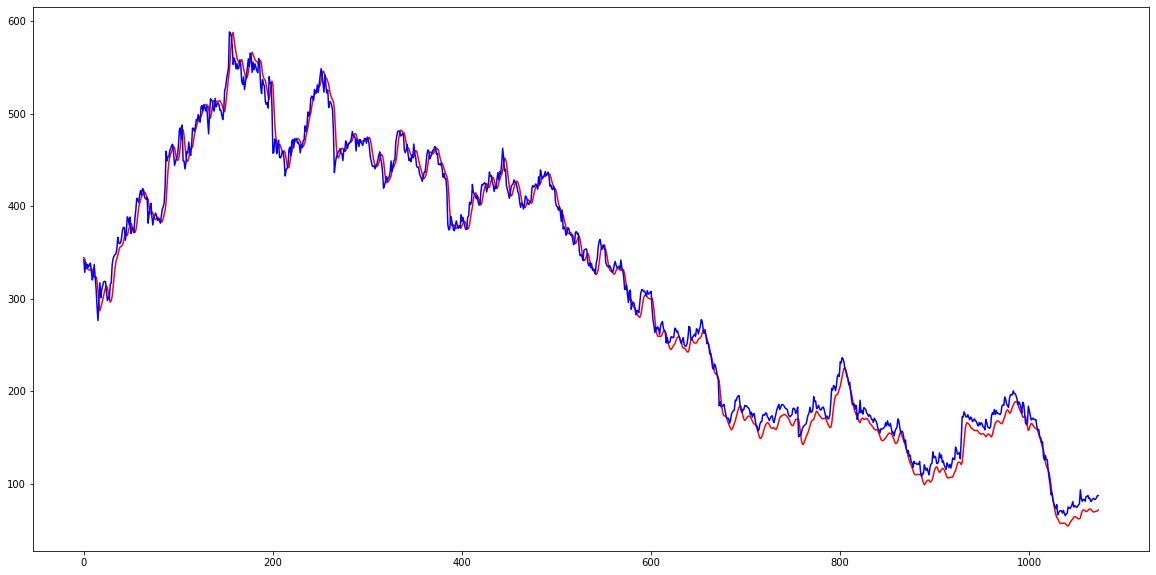

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,Activation
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("TATAMOTORS.csv")


df["Date"]=pd.to_datetime(df['Date'])
df.index=df['Date']

#plt.plot(df['Date'],df["Close"],label='Close Price history')

data=df.sort_index(axis=0,ascending=True)

#print(df.head())
#Extracting date and close column from the dataset
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
  new_dataset["Date"][i]=data['Date'][i]
  new_dataset["Close"][i]=data["Close"][i]

scaler=MinMaxScaler(feature_range=(0,1))

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)


train_data=scaled_data[0:4001]
valid_data=scaled_data[4001:]

#Prepare feature set for training of the model with timesteps of 30
features_set = []
labels = []
for i in range(30, len(train_data)):
  features_set.append(train_data[i-30:i])
  labels.append(train_data[i])
features_set=np.array(features_set)
labels=np.array(labels)

features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

#Model intialization
model=Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('linear'))
print(features_set.shape)

model.compile(optimizer=keras.optimizers.RMSprop(), loss =keras.losses.mean_squared_error,metrics=['accuracy'])
# loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
model.fit(features_set, labels, epochs = 10, batch_size = 20,validation_split=0.1)

#prepare features set for testing with timesteps of 30
test_data=scaled_data[(len(scaled_data)-len(valid_data)-30):]

pred_data=[]
#pred_labels=[]
for i in range(30,len(test_data)):
  pred_data.append(test_data[i-30:i])
  #pred_labels.append(test_data[i])
pred_data=np.array(pred_data)

score=model.evaluate(pred_data,valid_data,batch_size=20,verbose=0)
print("score: ",score)
predictions = model.predict(pred_data)
predictions=scaler.inverse_transform(predictions)
#checking the error via graph by plotting actual and prdicted values
valid_data=scaler.inverse_transform(valid_data)


plt.plot(predictions,color='red',label='Predicted values')
plt.plot(valid_data,color='blue',label='Actual values')


(3973, 28, 1)
Train on 3575 samples, validate on 398 samples
Epoch 1/10
3575/3575 [==============================] - 13s 4ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 2.2526e-04 - val_mean_squared_error: 2.2526e-04
Epoch 2/10
3575/3575 [==============================] - 12s 3ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 1.2372e-04 - val_mean_squared_error: 1.2372e-04
Epoch 3/10
3575/3575 [==============================] - 12s 3ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 1.3731e-04 - val_mean_squared_error: 1.3731e-04
Epoch 4/10
3575/3575 [==============================] - 12s 3ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 2.6945e-04 - val_mean_squared_error: 2.6945e-04
Epoch 5/10
3575/3575 [==============================] - 12s 3ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6/10
3575/3575 [==============================] - 12s 3ms/step - loss: 0.001

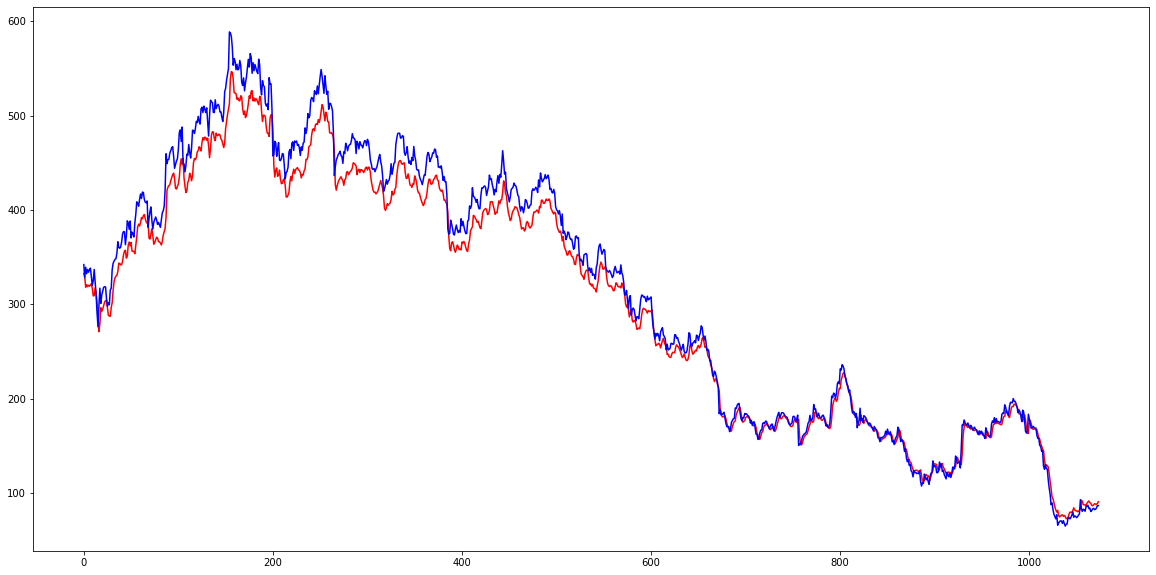

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import keras
from keras.models import Sequential
from keras.layers import GRU,Dropout,Dense,Activation
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("TATAMOTORS.csv")


df["Date"]=pd.to_datetime(df['Date'])
df.index=df['Date']

#plt.plot(df['Date'],df["Close"],label='Close Price history')

data=df.sort_index(axis=0,ascending=True)

#print(df.head())
#Extracting date and close column from the dataset
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
  new_dataset["Date"][i]=data['Date'][i]
  new_dataset["Close"][i]=data["Close"][i]

scaler=MinMaxScaler(feature_range=(0,1))

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)


train_data=scaled_data[0:4001]
valid_data=scaled_data[4001:]

#Prepare feature set for training of the model with timesteps of 30
features_set = []
labels = []
for i in range(28, len(train_data)):
  features_set.append(train_data[i-28:i])
  labels.append(train_data[i])
features_set=np.array(features_set)
labels=np.array(labels)

features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

#Model intialization
model=Sequential()
model.add(GRU(units=60, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.1))
model.add(GRU(units=60,return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('linear'))
print(features_set.shape)

model.compile(optimizer=keras.optimizers.RMSprop(), loss =keras.losses.mean_squared_error,metrics=['mean_squared_error'])
# loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
model.fit(features_set, labels, epochs = 10, batch_size = 20,validation_split=0.1)

#prepare features set for testing with timesteps of 30
test_data=scaled_data[(len(scaled_data)-len(valid_data)-28):]

pred_data=[]
#pred_labels=[]
for i in range(28,len(test_data)):
  pred_data.append(test_data[i-28:i])
  #pred_labels.append(test_data[i])
pred_data=np.array(pred_data)

score=model.evaluate(pred_data,valid_data,batch_size=20,verbose=0)
print("score: ",score)
predictions = model.predict(pred_data)
predictions=scaler.inverse_transform(predictions)
#checking the error via graph by plotting actual and prdicted values
valid_data=scaler.inverse_transform(valid_data)


plt.plot(predictions,color='red',label='Predicted values')
plt.plot(valid_data,color='blue',label='Actual values')